# Obtaining and Preparation of Data

In [1]:
# Imports

import pandas as pd 
import numpy as np

In [2]:
# Read csv data to a DataFrame 

df = pd.read_csv("TSLA.csv")

In [7]:
# Convert 'Date' field from object to datetime 

df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.3 KB


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Tesla Stock Price from 2011 - 2020')

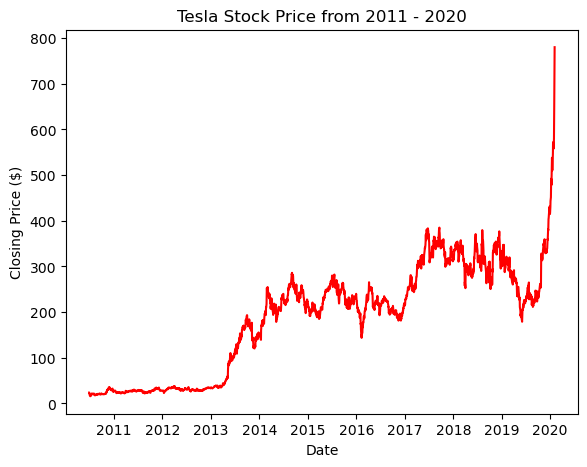

In [52]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(df["Date"], df["Close"], 'r')
axes.set_xlabel("Date")
axes.set_ylabel("Closing Price ($)")
axes.set_title("Tesla Stock Price from 2011 - 2020")

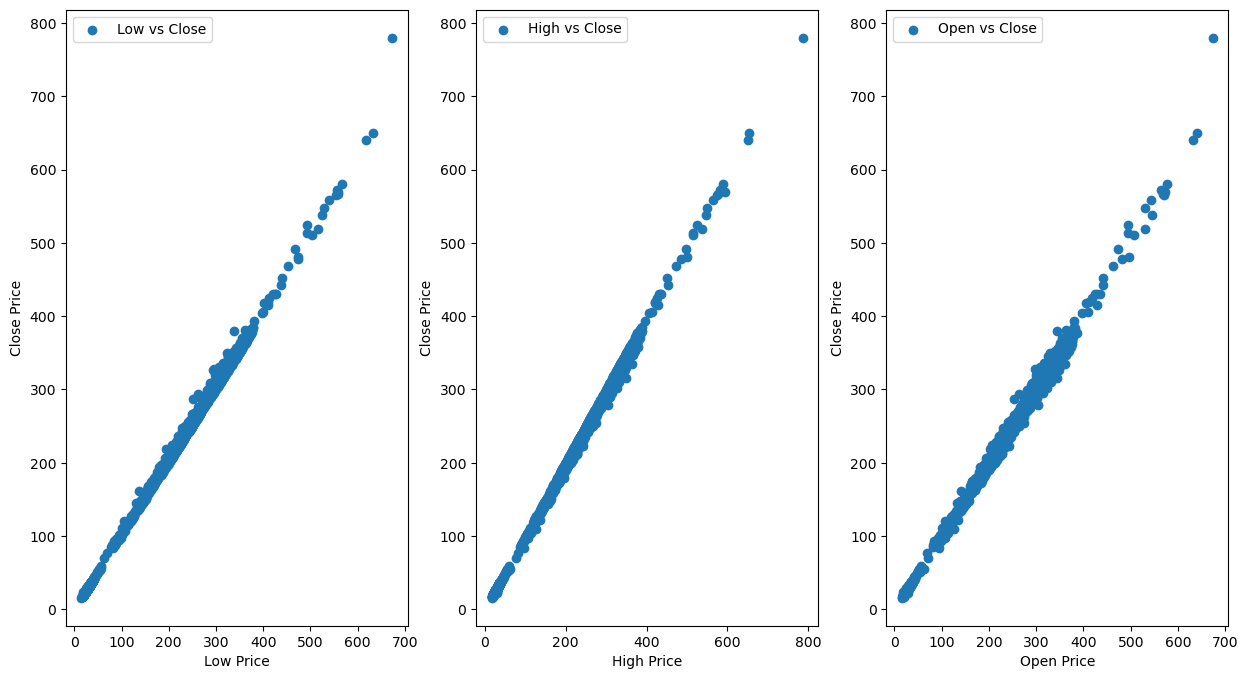

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,8))

axes[0].scatter(df["Low"], df["Close"], label="Low vs Close")
axes[0].set_xlabel("Low Price")
axes[0].set_ylabel("Close Price")

axes[1].scatter(df["High"], df["Close"], label="High vs Close")
axes[1].set_xlabel("High Price")
axes[1].set_ylabel("Close Price")

axes[2].scatter(df["Open"], df["Close"], label="Open vs Close")
axes[2].set_xlabel("Open Price")
axes[2].set_ylabel("Close Price")

axes[0].legend()
axes[1].legend()
axes[2].legend()


# Training and Testing Data

In [35]:
# Labels

y = df["Close"]

In [36]:
# Features

X = df[["Open", "Low", "High"]]

In [20]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the Model

In [38]:
# Importing the LinearRegression class

from sklearn.linear_model import LinearRegression

In [39]:
# Instantiating the class

lm = LinearRegression()

In [40]:
# Training the model on the training data

lm.fit(X_train, y_train)

LinearRegression()

# Predicting Test Data

In [24]:
# Predictions 

predictions = lm.predict(X_test)

Text(0, 0.5, 'predictions')

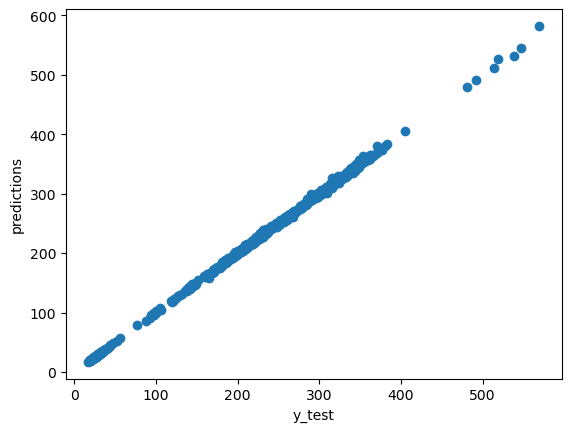

In [43]:
# Compare real test values to predicted values

plt.scatter(y_test, predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")

# Evaluating the Model

In [44]:
# Imports 

from sklearn import metrics

In [45]:
# Calculating the different to evaluate the validity of the model

mean_abs_error = metrics.mean_absolute_error(y_test, predictions)
mean_sqrd_error = metrics.mean_squared_error(y_test, predictions)
mean_sqrt_error = np.sqrt(mean_sqrd_error)

In [46]:
print(f"MAE: {mean_abs_error}")
print(f"MSE: {mean_sqrd_error}")
print(f"RMSE: {mean_sqrt_error}")

MAE: 1.3516233008287024
MSE: 4.238463298684222
RMSE: 2.058752850315992


# Residuals

In [47]:
# Imports

import seaborn as sns

C:\Users\mibai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


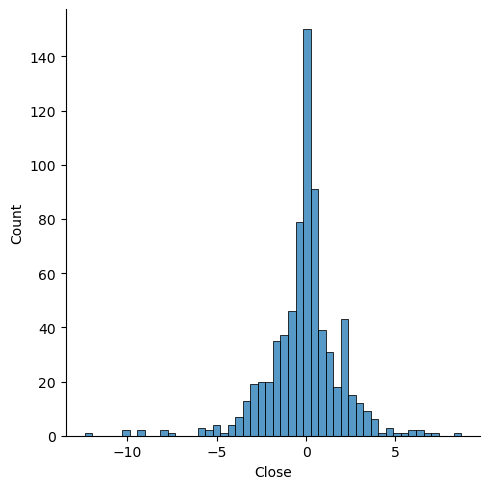

In [48]:
# Plotting a histogram of the residuals to ensure that we have a normal distribution

sns.displot((y_test-predictions),bins=50);

In [49]:
# Presenting the coefficients in a tabular format for simple analysis

df_coef = pd.DataFrame(lm.coef_, X.columns, ["Coefficients"])

df_coef

,Coefficients
Open,-0.675829
Low,0.769368
High,0.905623


## Insights from coefficients

- Holding all other features fixed, a 1 unit increase in the **Open** price is associated with an **decrease of 0.68 dollars in the Close price**.
- Holding all other features fixed, a 1 unit increase in the **Low** price is associated with an **increase of 0.7 dollars in the Close price**.
- Holding all other features fixed, a 1 unit increase in the **High** price is associated with an **increase of 0.9 dollars in the Close price**.

Therefore, the **High** price has the strongest relationship with the **Close** price, thus will most strongly influence it out of the 3 features (independent variables).